# Twitter Analysis

In [26]:
import tweepy
from textblob import TextBlob
from wordcloud import WordCloud
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

#Twitter API Credentials
consumer_key = ''
consumer_secret = ''
access_token = ''
access_token_secret = ''

#Authenticate the keys by creating authentication object
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)

#Set the access token and access token secret
auth.set_access_token(access_token, access_token_secret)

#create the API object by passing authentication information
api = tweepy.API(auth)

#Extract 200 tweets from twitter user
posts = api.user_timeline(screen_name = '@realDonaldTrump',count = 200,lang = 'en',tweet_mode = 'extended')

#print latest 5 tweets of this account
print("5 recent tweets")
i = 1
for tweet in posts[0:5]:
    print(str(i) + ') ' + tweet.full_text )
    print ("Source:", tweet.source+ '\n')
    i += 1



5 recent tweets
1) https://t.co/PXNO26lpoZ
Source: Twitter for iPhone

2) https://t.co/2rLJfoKmSS
Source: Twitter for iPhone

3) https://t.co/tuGfzK3QPE
Source: Twitter for iPhone

4) https://t.co/JEzkcjgLSy
Source: Twitter for iPhone

5) https://t.co/NmdLNsfDU2
Source: Twitter for iPhone



In [4]:
#Dataframe for tweets

df = pd.DataFrame([tweet.full_text for tweet in posts], columns = ['Tweets'])

df.head()

,Tweets
0,https://t.co/PXNO26lpoZ
1,https://t.co/2rLJfoKmSS
2,https://t.co/tuGfzK3QPE
3,https://t.co/JEzkcjgLSy
4,https://t.co/NmdLNsfDU2


In [25]:
#clean the tweets to remove the tags,RT and video links by defining a function

def cleantext(text):
    text = re.sub(r'@[A-Za-z0-9]+','',text)
    text = re.sub(r'#','',text)
    text = re.sub(r'RT[\s]+','',text)
    text = re.sub(r'https?://\S+','',text)
    
    return text

#apply the cleaning function to our dataframe
df['Tweets'] = df['Tweets'].apply(cleantext)

#display the cleaned tweets
df



,Tweets,Polarity,Subjectivity,Analysis
0,,0.000,0.000,Neutral
1,,0.000,0.000,Neutral
2,,0.000,0.000,Neutral
3,,0.000,0.000,Neutral
4,,0.000,0.000,Neutral
...,...,...,...,...
195,,0.000,0.000,Neutral
196,: President and participated virtually in th...,0.000,0.000,Neutral
197,,0.000,0.000,Neutral
198,,0.000,0.000,Neutral


In [6]:
#Now we create a function which will check the polarity and subjectivity of tweets

def getpolarity(text):
    return TextBlob(text).sentiment.polarity

def getsubjectivity(text):
    return TextBlob(text).sentiment.subjectivity

#create columns to store these values

df['Polarity'] = df['Tweets'].apply(getpolarity)
df['Subjectivity'] = df['Tweets'].apply(getsubjectivity)

#display new dataframe
df

,Tweets,Polarity,Subjectivity
0,,0.000,0.000
1,,0.000,0.000
2,,0.000,0.000
3,,0.000,0.000
4,,0.000,0.000
...,...,...,...
195,,0.000,0.000
196,: President and participated virtually in th...,0.000,0.000
197,,0.000,0.000
198,,0.000,0.000


(-0.5, 899.5, 599.5, -0.5)

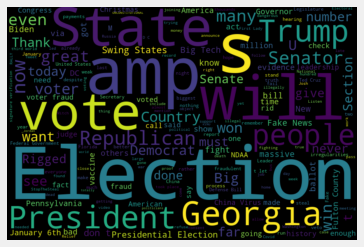

In [7]:
#visualize which word is used most often in the latest 200 tweets

words = ' '.join([twts for twts in df['Tweets']])
wordcloud = WordCloud(width = 900,height = 600,random_state = 21,max_font_size = 510).generate(words)

plt.imshow(wordcloud, interpolation = "bilinear")
plt.axis('off')

In [8]:
#create a function to analyse positive, neutral and negative tweets

def getanalysis(score):
    if score < 0:
        return 'Negative'
    elif score == 0:
        return 'Neutral'
    else:
        return 'Positive'

df['Analysis'] = df['Polarity'].apply(getanalysis)

#display new dataframe
df

,Tweets,Polarity,Subjectivity,Analysis
0,,0.000,0.000,Neutral
1,,0.000,0.000,Neutral
2,,0.000,0.000,Neutral
3,,0.000,0.000,Neutral
4,,0.000,0.000,Neutral
...,...,...,...,...
195,,0.000,0.000,Neutral
196,: President and participated virtually in th...,0.000,0.000,Neutral
197,,0.000,0.000,Neutral
198,,0.000,0.000,Neutral


In [9]:
#Sort all the positive tweets

j=1
sortedDF = df.sort_values(by=['Polarity'])
for i in range(0, sortedDF.shape[0]):
    if(sortedDF['Analysis'][i]=='Positive'):
        print(str(j) + ') ' + sortedDF['Tweets'][i])
        print()
        j += 1

1) Sorry, but the number of votes in the Swing States that we are talking about is VERY LARGE and totally OUTCOME DETERMINATIVE! Only the Democrats and some RINO’S would dare dispute this - even though they know it is true!

2) : We are excited to announce the site of our January 6th event will be The Ellipse in the President’s Park, just steps from th…

3) : Why are my own GA Senators ⁦⁩ &amp; ⁦⁩ not supporting this effort?

⁦⁩ ⁦⁩…

4) : The MarchForTrump bus has gone to more states than Joe Biden has supporters!

5) Great! 

6) : If you only do what's easy, you will seldom do what's right.

7) : If you are planning to attend peaceful protests in DC on the 6th, i recommend wearing a body camera. 
The more video angle…

8) : More interesting is that he suggests the inauguration date of January 20 can be extended.

9) : We have been marching all around the country for you Mr President. Now we will bring it to DC on Jan 6 and PROUDLY stand…

10) Something how Dr. Fauci is revered by the 

In [10]:
#Sort all the negative tweets

j=1
sortedDF = df.sort_values(by=['Polarity'])
for i in range(0, sortedDF.shape[0]):
    if(sortedDF['Analysis'][i]=='Negative'):
        print(str(j) + ') ' + sortedDF['Tweets'][i])
        print()
        j += 1

1) : The MarchForTrump bus rolls into Bowling Green today at 12 noon.

Senator , come join us &amp; pledge to contest the e…

2) : Hillary canceled her fireworks show a few days before the 2016 General Election.

3) I spoke to Secretary of State Brad Raffensperger yesterday about Fulton County and voter fraud in Georgia. He was unwilling, or unable, to answer questions such as the “ballots under table” scam, ballot destruction, out of state “voters”, dead voters, and more. He has no clue!

4) The number of cases and deaths of the China Virus is far exaggerated in the United States because of ’s ridiculous method of determination compared to other countries, many of whom report, purposely, very inaccurately and low. “When in doubt, call it Covid.” Fake News!

5) Wow, I guess it’s not good to go against a President who everyone in Georgia knows got you into office! 

6) : You know that sound when a sheet of glass begins to shatter, but slowly? That first hard CRACK!!! Then it spiders out

Text(0, 0.5, 'Subjectivity')

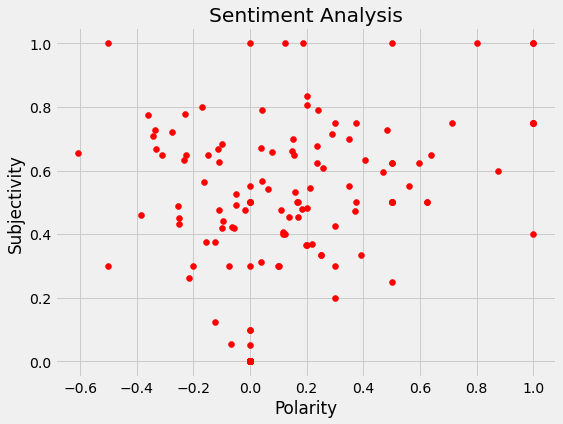

In [13]:
#plotting of polarity and subjectivity

plt.figure(figsize=(8,6))
for i in range(0,df.shape[0]):
    plt.scatter(df['Polarity'][i],df['Subjectivity'][i],color='Red')

plt.title("Sentiment Analysis")
plt.xlabel("Polarity")
plt.ylabel("Subjectivity")

In [20]:
#Percentage of positive tweets

ptweets = df[df.Analysis=='Positive']
ptweets = ptweets['Tweets']

round((ptweets.shape[0] / df.shape[0])*100,1)

37.0

In [24]:
#Percentage of negative tweets

ntweets = df[df.Analysis=='Negative']
ntweets = ntweets['Tweets']

round((ntweets.shape[0] / df.shape[0])*100,1)

18.5

In [23]:
#Percentage of neutral tweets

neutweets = df[df.Analysis=='Neutral']
neutweets = neutweets['Tweets']

round((neutweets.shape[0] / df.shape[0])*100,1)

44.5

<Figure size 720x360 with 0 Axes>

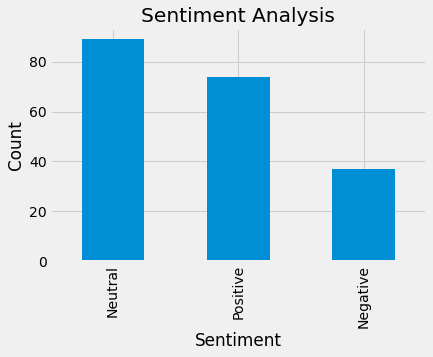

<Figure size 720x360 with 0 Axes>

In [35]:
#plot the value counts

df['Analysis'].value_counts().plot(kind='bar')

plt.title('Sentiment Analysis')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.figure(figsize=(10,5))